<p Style= "text-align: right"> 02/06/2023 </p>

<img src = "data_analysis.jpg">
<h2 Style = "color:#CC9900; text-align: center" > Portafolio de evidencias </h2>

<p> Este notebook contiene los conocimientos prácticos que se desarrollarán a lo largo del curso de Análisis de Datos durante el segundo cuatrimestre del 2023. </p>

<p Style = "text-align: justify"> En este caso se realizará un análisis de los datos de los vehículos a la venta por parte de la empresa Pk2, esta empresa se encuentra interesada en responder una pregunta de negocio particular. </p>

<p Style = "text-align: left; font-weight: bold; color: #08295e" > ¿Como se puede incrementar las ventas de autos de segunda mano?</p>

<p Style = "text-align: justify"> Para esto se realiza un analisis del conjunto de datos facilitado por la empresa a efectos de poder brindar conocimiento sobre las ditribuciones de sus lotes de venta, los autos con mayor precio, o caracteristicas de los autos, esto para dotar de insumos suficientes a la toma de desiciones.</p>

</br>

<p Style = 'text-align: right'>16/06/2023</p>

<h3 Style = "color: #4169E1"> 1. Carga y estandarizacion de los set de datos</h3>

<ol>
    <li>Importar las librerias necesarias </li>
    <li>Importar los set de datos</li>
    <li>Fast EDA - Revision estadistica general del set de datos </li>
    <li>Revision de Encabezados</li>
    <li>Unir los set de datos</li>
</ol>

<h4 Style = "color: #5F9EA0"> 1.1 Importacion de librerias </h4>

In [1]:
import pandas as pd #Se usa para el manejo de dataFrame.
import numpy as np #Se usa para el manejo de estructuras de datos.
import matplotlib.pyplot as plt #Se usa para crear graficos. 

<h4 Style = "color: #FF8C00"> 1.2 Importacion de set de datos </h4>

In [2]:
cols = ["symboling", "normalized", "make", "fuel", "aspiration", "doors", 
       "style", "wheels", "engine", "base", "length", "width", "heingt",
       "curb", "engineType", "Cylinders", "engine-size", "system", "bore", "stroke",
       "compression", "horsepower", "peak", "City", "Higway", "price"]
df_1er_autos = pd.read_csv("autos.csv", names = cols)
df_2do_autos = pd.read_csv("Autos1.csv", names = cols)



In [3]:
df_1er_autos.shape

(197, 26)

In [4]:
df_2do_autos.shape

(29, 26)

In [5]:
df_1er_autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
df_1er_autos.tail(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
192,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
193,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985


<h4 Style = "color: #8B0000"> 1.2 Fast EDA </h4>

In [7]:
df_1er_autos.describe()

,symboling,base,length,width,heingt,curb,engine-size,compression,City,Higway
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.913706,98.409645,173.450254,65.812690,53.628934,2534.796954,126.263959,10.128020,25.416244,30.984772
std,1.202746,5.866965,12.213912,2.128306,2.438891,520.401159,42.282594,3.934467,6.566717,6.908644
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.000000,52.000000,2140.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,96.500000,172.600000,65.400000,53.900000,2405.000000,110.000000,9.000000,25.000000,30.000000
75%,2.000000,100.400000,178.500000,66.500000,55.500000,2844.000000,141.000000,9.400000,30.000000,36.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [8]:
df_1er_autos.head(4)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


In [9]:
df_1er_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symboling    197 non-null    int64  
 1   normalized   197 non-null    object 
 2   make         197 non-null    object 
 3   fuel         197 non-null    object 
 4   aspiration   197 non-null    object 
 5   doors        197 non-null    object 
 6   style        197 non-null    object 
 7   wheels       197 non-null    object 
 8   engine       197 non-null    object 
 9   base         197 non-null    float64
 10  length       197 non-null    float64
 11  width        197 non-null    float64
 12  heingt       197 non-null    float64
 13  curb         197 non-null    int64  
 14  engineType   197 non-null    object 
 15  Cylinders    197 non-null    object 
 16  engine-size  197 non-null    int64  
 17  system       197 non-null    object 
 18  bore         197 non-null    object 
 19  stroke  

In [10]:
df_2do_autos.describe()

,symboling,base,length,width,heingt,curb,engine-size,bore,stroke,compression,horsepower,peak,City,Higway,price
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,0.827586,100.103448,177.186207,66.134483,54.406897,2580.000000,128.000000,3.330690,3.402069,11.475862,102.413793,4970.689655,25.896552,31.448276,11692.793103
std,1.691765,3.082726,7.178327,0.917012,1.666676,310.887325,23.653752,0.240088,0.108278,5.318610,29.382353,448.910833,5.045117,5.803855,2906.059106
min,-2.000000,94.500000,159.300000,64.000000,51.400000,2209.000000,97.000000,3.010000,3.150000,8.500000,52.000000,4200.000000,19.000000,24.000000,7775.000000
25%,-1.000000,97.300000,171.700000,65.500000,53.000000,2300.000000,109.000000,3.190000,3.350000,9.000000,85.000000,4800.000000,24.000000,28.000000,9639.000000
50%,2.000000,100.400000,176.200000,66.500000,54.900000,2536.000000,122.000000,3.270000,3.400000,9.300000,92.000000,5200.000000,24.000000,30.000000,11199.000000
75%,2.000000,102.400000,183.100000,66.900000,55.700000,2912.000000,146.000000,3.620000,3.500000,9.500000,116.000000,5400.000000,27.000000,34.000000,13415.000000
max,3.000000,104.500000,188.800000,67.700000,57.500000,3151.000000,171.000000,3.780000,3.540000,23.000000,161.000000,5500.000000,37.000000,46.000000,17669.000000


In [11]:
df_2do_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symboling    29 non-null     int64  
 1   normalized   29 non-null     object 
 2   make         29 non-null     object 
 3   fuel         29 non-null     object 
 4   aspiration   29 non-null     object 
 5   doors        29 non-null     object 
 6   style        29 non-null     object 
 7   wheels       29 non-null     object 
 8   engine       29 non-null     object 
 9   base         29 non-null     float64
 10  length       29 non-null     float64
 11  width        29 non-null     float64
 12  heingt       29 non-null     float64
 13  curb         29 non-null     int64  
 14  engineType   29 non-null     object 
 15  Cylinders    29 non-null     object 
 16  engine-size  29 non-null     int64  
 17  system       29 non-null     object 
 18  bore         29 non-null     float64
 19  stroke    

<h4 Style = "color: #BDB76B"> 1.4 Revision de encabezados </h4>

<ul>
    <li>Nombres de columnas no deben contener espacios en blanco</li>
    <li>Nombres de columnas no deben comenzar con numeros</li>
    <li>No deben existir nombres repetidos</li>
    <li>Recomendacion: la primera palabra debe ser en minuscula</li>

</ul>

In [12]:
df_1er_autos.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [13]:
df_2do_autos.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [14]:
# Cambio del nombre de columnas del primer dataset para ajustarlas a buenas practicas
df_1er_autos.rename({'engine-size':'engineSize'}, axis=1, inplace=True)
df_1er_autos.rename({'Cylinders':'cylinders'}, axis=1, inplace=True)
df_1er_autos.rename({'City':'city'}, axis=1, inplace=True)
df_1er_autos.rename({'Higway':'higway'}, axis=1, inplace=True)

In [15]:
df_1er_autos.columns
#comprobacion del cambio de nombres.

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'cylinders', 'engineSize', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'city', 'higway',
       'price'],
      dtype='object')

In [16]:
# Cambio del nombre de columnas del segundo dataset para ajustarlas a buenas practicas
df_2do_autos.rename({'engine-size':'engineSize'}, axis=1, inplace=True)
df_2do_autos.rename({'Cylinders':'cylinders'}, axis=1, inplace=True)
df_2do_autos.rename({'City':'city'}, axis=1, inplace=True)
df_2do_autos.rename({'Higway':'higway'}, axis=1, inplace=True)

In [17]:
df_2do_autos.columns
#comprobacion del cambio de nombres.

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'cylinders', 'engineSize', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'city', 'higway',
       'price'],
      dtype='object')

<h4 Style = "color: #8B008B"> 1.5 Unir los set de datos </h4>

In [18]:
tplDataFrame = [df_1er_autos, df_2do_autos]
dfAutos = pd.concat(tplDataFrame)
dfAutos.shape

(226, 26)

In [19]:
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,city,higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [20]:
dfAutos.tail(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,city,higway,price
24,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.4,23.0,68,4500,33,38,13845
25,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.4,9.0,88,5500,25,31,12290
26,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
27,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
28,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985


<p Style = 'text-align: right'>30/06/2023</p>

<h3 Style = "color: #483D8B"> 2. Manejo de valores faltantes </h3>

<ol>
    <li>Identificar como se visualizan los valores faltantes en DF </li>
    <li>Contar la cantidad de valores faltantes por variable (columnas)</li>
    <li>Imputacion simple de valores numericos </li>
    <li>Imputacion simple de valores categoricos</li>
    <li>Eliminar observaciones del DF</li>
</ol>

<h4 Style = "color: #8B008B"> 2.1 Identificar como se visualizan los valores faltantes en DF  </h4>

In [21]:
dfAutos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 28
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symboling    226 non-null    int64  
 1   normalized   226 non-null    object 
 2   make         226 non-null    object 
 3   fuel         226 non-null    object 
 4   aspiration   226 non-null    object 
 5   doors        226 non-null    object 
 6   style        226 non-null    object 
 7   wheels       226 non-null    object 
 8   engine       226 non-null    object 
 9   base         226 non-null    float64
 10  length       226 non-null    float64
 11  width        226 non-null    float64
 12  heingt       226 non-null    float64
 13  curb         226 non-null    int64  
 14  engineType   226 non-null    object 
 15  cylinders    226 non-null    object 
 16  engineSize   226 non-null    int64  
 17  system       226 non-null    object 
 18  bore         226 non-null    object 
 19  stroke   

In [22]:
# Codigo para reemplazar valores faltantes representados por caracteres como "?"

dfAutos.replace("?", np.nan, inplace = True)
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,city,higway,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h4 Style = "color: #C71585"> 2.2 Contar la cantidad de valores faltantes por variable (columnas) </h4>

In [23]:
dfTemp = dfAutos.isnull()
dfTemp.head(5)
# En este caso, "True" corresponde a valores faltantes.

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,city,higway,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
for col in dfTemp.columns.values.tolist():
    print(col)
    print(dfTemp[col].value_counts())
    print("")

symboling
False    226
Name: symboling, dtype: int64

normalized
False    180
True      46
Name: normalized, dtype: int64

make
False    226
Name: make, dtype: int64

fuel
False    226
Name: fuel, dtype: int64

aspiration
False    226
Name: aspiration, dtype: int64

doors
False    224
True       2
Name: doors, dtype: int64

style
False    226
Name: style, dtype: int64

wheels
False    226
Name: wheels, dtype: int64

engine
False    226
Name: engine, dtype: int64

base
False    226
Name: base, dtype: int64

length
False    226
Name: length, dtype: int64

width
False    226
Name: width, dtype: int64

heingt
False    226
Name: heingt, dtype: int64

curb
False    226
Name: curb, dtype: int64

engineType
False    226
Name: engineType, dtype: int64

cylinders
False    226
Name: cylinders, dtype: int64

engineSize
False    226
Name: engineSize, dtype: int64

system
False    226
Name: system, dtype: int64

bore
False    222
True       4
Name: bore, dtype: int64

stroke
False    222
True       

<h4 Style = "color: #48D1CC"> 2.3 Imputacion simple de valores numericos </h4>

In [25]:
# Esta imputacion o cambio de datos faltantes, se hace por los valores promedio del conjunto de datos, solo en 
# aquellos casos en los que el dato en cuestion no es critico (por ejemplo presion arterial) y 
# donde los datos faltantes no representen mas del 80%

avgNormalizadas = dfAutos["normalized"].astype("float").mean(axis=0)
dfAutos["normalized"].replace(np.nan, avgNormalizadas, inplace=True)
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,city,higway,price
0,3,122.283333,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.283333,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.283333,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [26]:
# Otra forma de hacer la imputacion por valores enteros.

avgBase = dfAutos["base"].astype("float").mean(axis=0)
avgBase

98.62699115044246

In [27]:
dfAutos["base"].replace(np.nan, 99, inplace=True)
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,city,higway,price
0,3,122.283333,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.283333,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.283333,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [28]:
# Continuando con la imputacion del resto de variables

avgEnginesize = dfAutos["engineSize"].astype("float").mean(axis=0)
avgEnginesize

126.48672566371681

In [29]:
dfAutos["engineSize"].replace(np.nan, avgNormalizadas, inplace=True)
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,city,higway,price
0,3,122.283333,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.283333,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.283333,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [30]:
avgBore = dfAutos["bore"].astype("float").mean(axis=0)
dfAutos["bore"].replace(np.nan, avgNormalizadas, inplace=True)

In [31]:
avgStroke = dfAutos["stroke"].astype("float").mean(axis=0)
dfAutos["stroke"].replace(np.nan, avgNormalizadas, inplace=True)

In [32]:
avgHorsepower = dfAutos["horsepower"].astype("float").mean(axis=0)
dfAutos["horsepower"].replace(np.nan, avgNormalizadas, inplace=True)

In [33]:
avgpeak = dfAutos["peak"].astype("float").mean(axis=0)
dfAutos["peak"].replace(np.nan, avgNormalizadas, inplace=True)

<h4 Style = "color:#3CB371"> 2.4 Imputacion simple de valores categoricos </h4>

In [34]:
dfAutos['doors'].value_counts().idxmax()

'four'

In [35]:
dfAutos['doors'].replace(np.nan, 'four', inplace=True)

<h4 Style = "color:#7B68EE"> 2.5 Eliminar filas con valores faltantes </h4>

In [36]:
# Cuando se eliminan datos, no puede superar el 10% de la data.

In [37]:
dfAutos.dropna(subset = ["price"], axis=0, inplace=True)
#ajuste de indice
dfAutos.reset_index(drop=True, inplace=True)

In [38]:
# Esto se hace para ver que todos los datos hayan sido limpiados correctamente, no debe aparecer "True"
dfTemp = dfAutos.isnull()
for col in dfTemp.columns.values.tolist():
    print(col)
    print(dfTemp[col].value_counts())
    print("")

symboling
False    222
Name: symboling, dtype: int64

normalized
False    222
Name: normalized, dtype: int64

make
False    222
Name: make, dtype: int64

fuel
False    222
Name: fuel, dtype: int64

aspiration
False    222
Name: aspiration, dtype: int64

doors
False    222
Name: doors, dtype: int64

style
False    222
Name: style, dtype: int64

wheels
False    222
Name: wheels, dtype: int64

engine
False    222
Name: engine, dtype: int64

base
False    222
Name: base, dtype: int64

length
False    222
Name: length, dtype: int64

width
False    222
Name: width, dtype: int64

heingt
False    222
Name: heingt, dtype: int64

curb
False    222
Name: curb, dtype: int64

engineType
False    222
Name: engineType, dtype: int64

cylinders
False    222
Name: cylinders, dtype: int64

engineSize
False    222
Name: engineSize, dtype: int64

system
False    222
Name: system, dtype: int64

bore
False    222
Name: bore, dtype: int64

stroke
False    222
Name: stroke, dtype: int64

compression
False    2

<p Style = 'text-align: right'>14/07/2023</p>

<h3 Style = "color: #2E8B57"> 3. Estandarizacion de Datos </h3>

<ol>
    <li>Verificar el dominio de cada una de las variables (si es necesario se ajusta) </li>
    <li>Convertir valores en funcion de una interpretacion o contexto (tropicalizar datos)</li>
    <li>Normalizar valores (volver comparables valores que no son asimetricos entre si) </li>
    <li>Crear categorias o rangos (Binning)</li>
</ol>

<h4 Style = "color: #D2B48C"> 3.1 Verificar el dominio de cada una de las variables</h4>

In [39]:
#Se identifica el tipo de variables.

dfAutos.dtypes

symboling        int64
normalized      object
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
cylinders       object
engineSize       int64
system          object
bore            object
stroke          object
compression    float64
horsepower      object
peak            object
city             int64
higway           int64
price           object
dtype: object

In [40]:
# Se cambia el tipo de variable (a la que realmente corresponde) de acuerdo con la metadata del dataset. 
# Cambio de variables a tipo int. 

dfAutos[["normalized"]] = dfAutos [["normalized"]].astype("int")
dfAutos[["peak"]] = dfAutos [["peak"]].astype("int")
dfAutos[["horsepower"]] = dfAutos [["horsepower"]].astype("int")
dfAutos[["price"]] = dfAutos [["price"]].astype("int")
dfAutos.dtypes

symboling        int64
normalized       int32
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
cylinders       object
engineSize       int64
system          object
bore            object
stroke          object
compression    float64
horsepower       int32
peak             int32
city             int64
higway           int64
price            int32
dtype: object

In [41]:
# Otra forma de hacer el cambio de variable, a tipo float.
dfAutos[["bore", "stroke",]] = dfAutos [["bore", "stroke"]].astype("float")
dfAutos.dtypes

symboling        int64
normalized       int32
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
cylinders       object
engineSize       int64
system          object
bore           float64
stroke         float64
compression    float64
horsepower       int32
peak             int32
city             int64
higway           int64
price            int32
dtype: object

<h4 Style = "color: #FF6347"> 3.2 Estandarizar los datos </h4>

In [42]:
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,city,higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [43]:
# Inclusion de columnas calculadas

dfAutos["City L/100km (calc)"] = 235/dfAutos["city"]
dfAutos["Higway L/100km (calc)"] = 235/dfAutos["higway"]
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,bore,stroke,compression,horsepower,peak,city,higway,price,City L/100km (calc),Higway L/100km (calc)
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,12.368421,9.038462


<h4 Style = "color: #40E0D0"> 3.3 Volver variables comparables </h4>

In [44]:
dfTemp = dfAutos[["horsepower", "peak"]]
dfTemp.head(3)

,horsepower,peak
0,111,5000
1,111,5000
2,154,5000


In [45]:
# Normalizacion de datos 
dfAutos["horsepower (norm)"] = dfAutos["horsepower"]/dfAutos["horsepower"].max()
dfAutos["peak (norm)"] = dfAutos["peak"]/dfAutos["peak"].max()
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,compression,horsepower,peak,city,higway,price,City L/100km (calc),Higway L/100km (calc),horsepower (norm),peak (norm)
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000,21,27,13495,11.190476,8.703704,0.423664,0.757576
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000,21,27,16500,11.190476,8.703704,0.423664,0.757576
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,9.0,154,5000,19,26,16500,12.368421,9.038462,0.587786,0.757576


<h4 Style = "color: #9ACD32"> 3.4 Binning </h4>

In [46]:
dfTemp.head(5)

,horsepower,peak
0,111,5000
1,111,5000
2,154,5000
3,102,5500
4,115,5500


In [47]:
# Solo funciona para datos numericos, NO para categoricos.

In [48]:
bins_prueba = np.linspace(min(dfAutos["horsepower"]), max(dfAutos["horsepower"]), 4)
bins_prueba

# Como ya sabemos por la metadata que el valor minimo es 48 y el valor maximo es 262, por un tema de eficiencia se procede 
# a utilizar el siguiente codigo, que es mas conveniente.

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [49]:
bins = np.linspace(48,262,4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [50]:
categoria = ["bajo", "medio", "alto"]
dfAutos["horsepower(Bins)"] = pd.cut(dfAutos["horsepower"], bins, 
                                     labels = categoria, include_lowest =True)

dfAutos[["horsepower", "horsepower(Bins)"]].head(5)

,horsepower,horsepower(Bins)
0,111,bajo
1,111,bajo
2,154,medio
3,102,bajo
4,115,bajo


<h2 style="color: #6495ED">4. Visualización de Datos</h2>

<p>En este apartado se van a crear diferentes visualizaciones (Gráficas), las cuales nos ayudan a realizar la interpretaion y analisis de la informacion del set</p>
</br>

<p>Estos son tres elementos fundamentales para poder crear las visualizaciones:</p>
<ol>
<li>Preguntas de negocio a responder</li>
<li>Pleno conocimiento del set de datos</li>
<li>Experiencia de negocio</li>
</ol>

<h5 style="color: #005f82">4.1 Configuración para los Gráficos</h5>

 

<p>Cuantos Autos existen segun fabricante?
   Cual fabricante tiene mayor presencia en el parque de Autos? </p>

In [51]:
import matplotlib as mpl #Se usa para configurar las graficas.

In [52]:
#Remueve las lineas de los axis.
mpl.rcParams["axes.spines.bottom"] = True
mpl.rcParams["axes.spines.left"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

In [53]:
gf = dfAutos.groupby(['make']).count()
gf = gf.iloc[:,:1]
gf = gf.sort_values('symboling', ascending=False)
gf

,symboling
make,
toyota,46
volkswagen,24
nissan,18
mazda,17
mitsubishi,13
honda,13
subaru,12
peugot,11
dodge,9


findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.


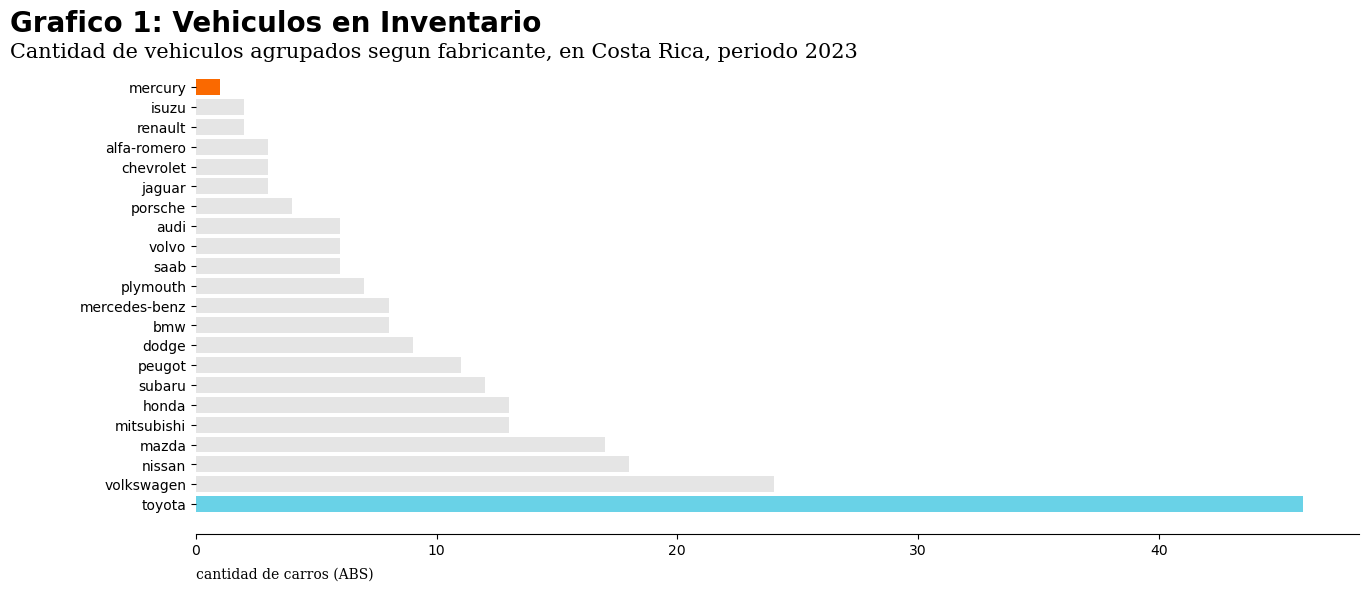

In [54]:
fig, ax = plt.subplots(1,1, figsize =(15,6.9), dpi=100)

 
eje_x = gf.index.tolist()
data = gf["symboling"].tolist()


bar_colors = ['#69d2e7','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5',
             '#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5',
             '#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#fa6900']


ax.barh(eje_x, data, color=bar_colors)


#--------------------------------------------------------------------------------------------#
#-----------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EFES DEL GRAFICO----------------#
#--------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO

 
title = "Grafico 1: Vehiculos en Inventario"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif",
             fontname = "Liberation Sans Narrow")


#FORMATO DEL SUBTITULO
subTitle = "Cantidad de vehiculos agrupados segun fabricante, en Costa Rica, periodo 2023"
ax.set_title(subTitle,
             horizontalalignment = "left",
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

 
#FORMATO AL EJE (X/Y)
etiqueta = "cantidad de carros (ABS)"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")

 

ax.xaxis.set_label_coords(x=0, y=-0.07, transform = ax.transAxes)

 
#FORMATO TAMANO LETRA AMBOS EJES
ax.tick_params(axis='both', labelsize = 10)

 
#CONFIGURA LA UBICACION EL TITULO, SUBTITULO Y GRAFICO
plt.subplots_adjust(top = 0.80)
 

plt.show()

In [55]:
# Pregunta por responder realizada en clase: Cuantos autos existen en inventario segun la cantidad de caballos de fuerza?

In [56]:
gf_1 = dfAutos.groupby(['horsepower']).count()
gf_1 = gf_1.iloc[:,:1]
gf_1 = gf_1.sort_values('symboling', ascending=False)
gf_1

,symboling
horsepower,
68,21
116,14
69,10
110,9
70,9
92,8
95,7
88,7
62,6


In [57]:
gf_1.count()

symboling    56
dtype: int64

findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.


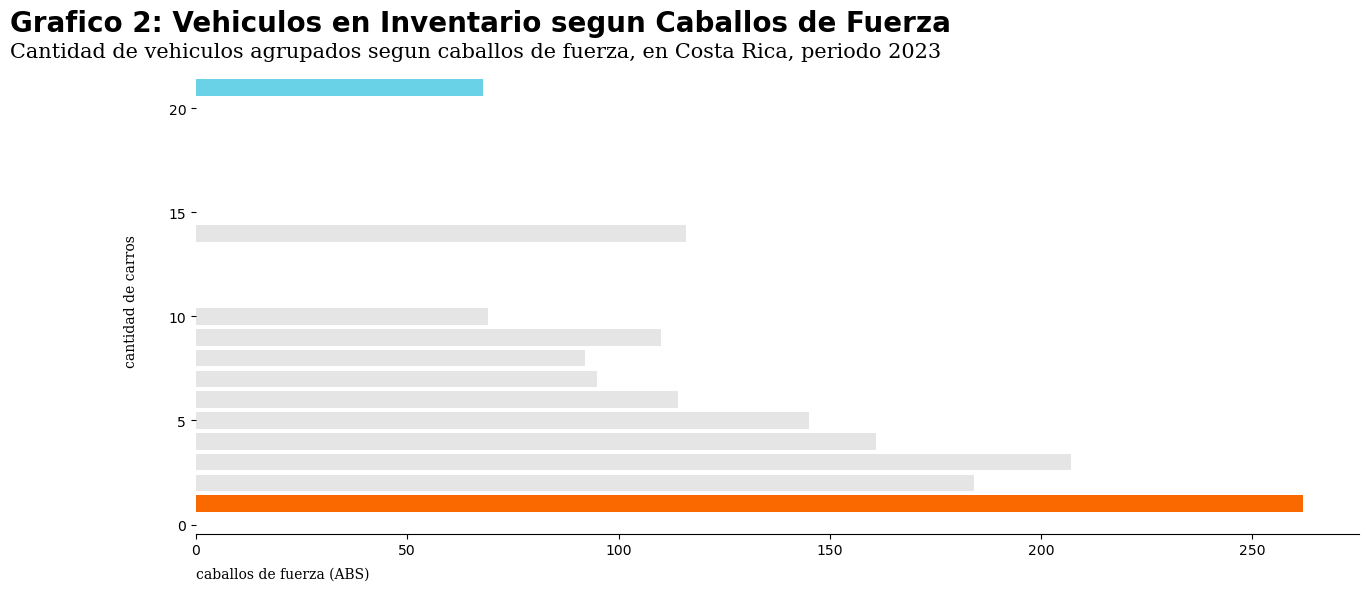

In [58]:
fig, ax = plt.subplots(1,1, figsize =(15,6.9), dpi=100)

 
eje_x = gf_1["symboling"].tolist()
data = gf_1.index.tolist()


bar_colors = ['#69d2e7', '#e5e5e5', '#e5e5e5', '#e5e5e5', '#e5e5e5', '#e5e5e5', '#e5e5e5',
              '#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5',
              '#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5',
              '#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5',
              '#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5',
              '#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5',
              '#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#fa6900']


ax.barh(eje_x, data, color=bar_colors)


#--------------------------------------------------------------------------------------------#
#-----------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EFES DEL GRAFICO----------------#
#--------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO

 
title = "Grafico 2: Vehiculos en Inventario segun Caballos de Fuerza"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif",
             fontname = "Liberation Sans Narrow")


#FORMATO DEL SUBTITULO
subTitle = "Cantidad de vehiculos agrupados segun caballos de fuerza, en Costa Rica, periodo 2023"
ax.set_title(subTitle,
             horizontalalignment = "left",
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

 
#FORMATO AL EJE (X/Y)
etiqueta = "caballos de fuerza (ABS)"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")

etiquetay = "cantidad de carros"
ax.set_ylabel(etiquetay,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")

ax.xaxis.set_label_coords(x=0, y=-0.07, transform = ax.transAxes)
ax.yaxis.set_label_coords(x=-0.05, y=0.35, transform = ax.transAxes)

 
#FORMATO TAMANO LETRA AMBOS EJES
ax.tick_params(axis='both', labelsize = 10)

 
#CONFIGURA LA UBICACION EL TITULO, SUBTITULO Y GRAFICO
plt.subplots_adjust(top = 0.80)
 

plt.show()

In [59]:
# Desarrollado en clase del 04 de Agosto del 2023.

gf = dfAutos.groupby(['horsepower']).count()
gf = gf.iloc[:,:1]
gf = gf.sort_values('symboling', ascending=False)
gf

,symboling
horsepower,
68,21
116,14
69,10
110,9
70,9
92,8
95,7
88,7
62,6


findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.


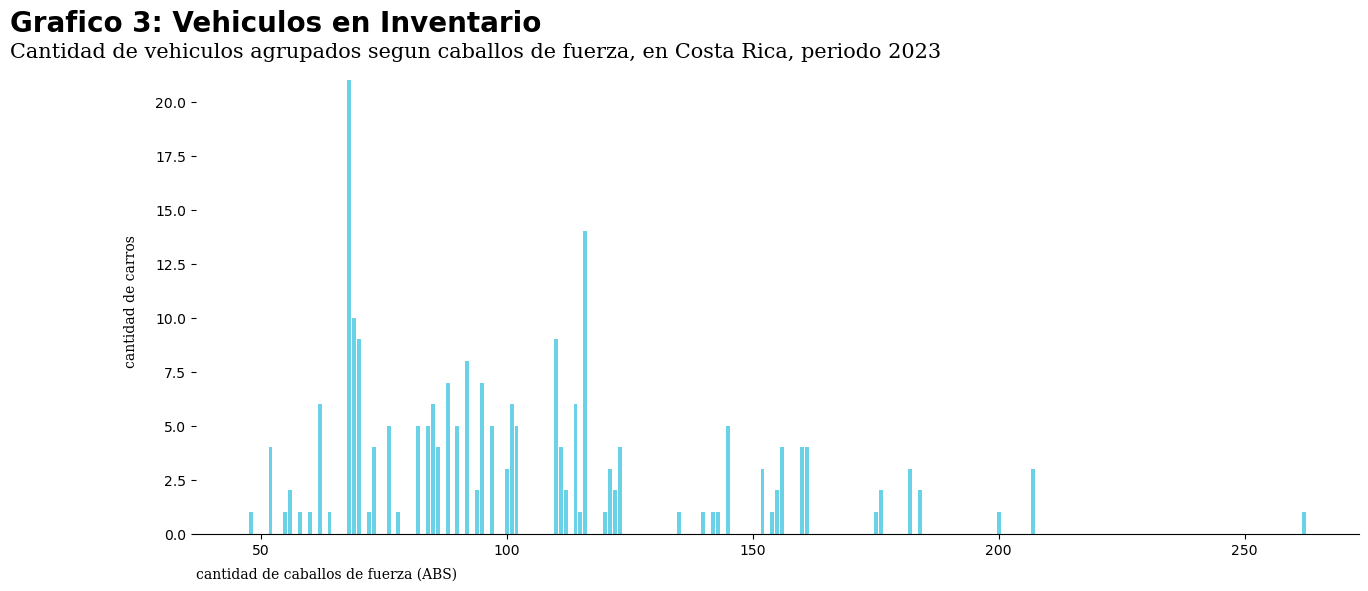

In [60]:
fig, ax = plt.subplots(1,1, figsize =(15,6.9), dpi=100)

eje_x = gf.index.tolist()
data = gf["symboling"].tolist()

bar_colors = ['#69d2e7']

ax.bar(eje_x, data, color=bar_colors)


#--------------------------------------------------------------------------------------------#
#-----------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EFES DEL GRAFICO----------------#
#--------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO


title = "Grafico 3: Vehiculos en Inventario"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif",
             fontname = "Liberation Sans Narrow")


#FORMATO DEL SUBTITULO
subTitle = "Cantidad de vehiculos agrupados segun caballos de fuerza, en Costa Rica, periodo 2023"
ax.set_title(subTitle,
             horizontalalignment = "left",
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")
 

#FORMATO AL EJE (X/Y)
etiqueta = "cantidad de caballos de fuerza (ABS)"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")

etiquetay = "cantidad de carros"
ax.set_ylabel(etiquetay,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")

ax.xaxis.set_label_coords(x=0, y=-0.07, transform = ax.transAxes)
ax.yaxis.set_label_coords(x=-0.05, y=0.35, transform = ax.transAxes)


#FORMATO TAMANO LETRA AMBOS EJES
ax.tick_params(axis='both', labelsize = 10)

#CONFIGURA LA UBICACION EL TITULO, SUBTITULO Y GRAFICO
plt.subplots_adjust(top = 0.80)

plt.show()

In [61]:
gf = dfAutos.groupby(['horsepower(Bins)']).count()
gf = gf.iloc[:,:1]
gf = gf.sort_values('symboling', ascending=False)
gf

,symboling
horsepower(Bins),
bajo,172
medio,45
alto,5


findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.


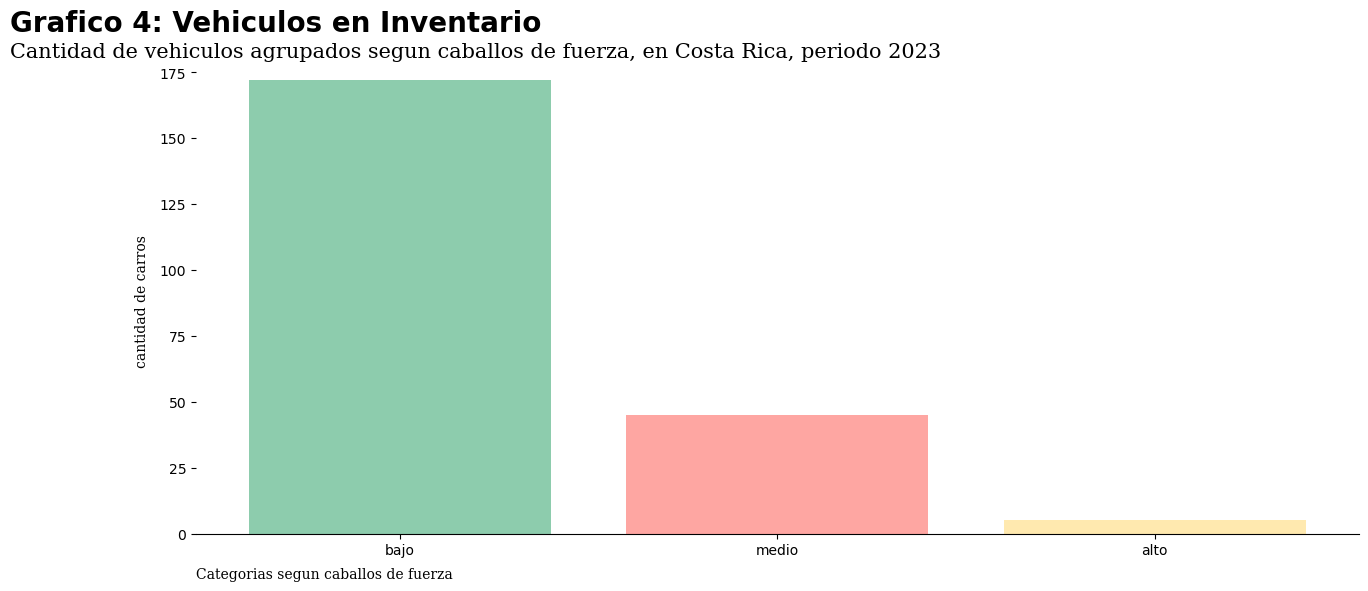

In [62]:
fig, ax = plt.subplots(1,1, figsize =(15,6.9), dpi=100)


eje_x = gf.index.tolist()
data = gf["symboling"].tolist()

bar_colors = ['#8dccad', '#fea6a2', '#ffe9af']

ax.bar(eje_x, data, color=bar_colors)


#--------------------------------------------------------------------------------------------#
#-----------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EFES DEL GRAFICO----------------#
#--------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO


title = "Grafico 4: Vehiculos en Inventario"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif",
             fontname = "Liberation Sans Narrow")
 

#FORMATO DEL SUBTITULO
subTitle = "Cantidad de vehiculos agrupados segun caballos de fuerza, en Costa Rica, periodo 2023"
ax.set_title(subTitle,
             horizontalalignment = "left",
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

 

#FORMATO AL EJE (X/Y)
etiqueta = "Categorias segun caballos de fuerza"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")

 
etiquetay = "cantidad de carros"
ax.set_ylabel(etiquetay,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")


ax.xaxis.set_label_coords(x=0, y=-0.07, transform = ax.transAxes)
ax.yaxis.set_label_coords(x=-0.04, y=0.35, transform = ax.transAxes)


#FORMATO TAMANO LETRA AMBOS EJES
ax.tick_params(axis='both', labelsize = 10)
 

#CONFIGURA LA UBICACION EL TITULO, SUBTITULO Y GRAFICO
plt.subplots_adjust(top = 0.80)
 

plt.show()

findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.


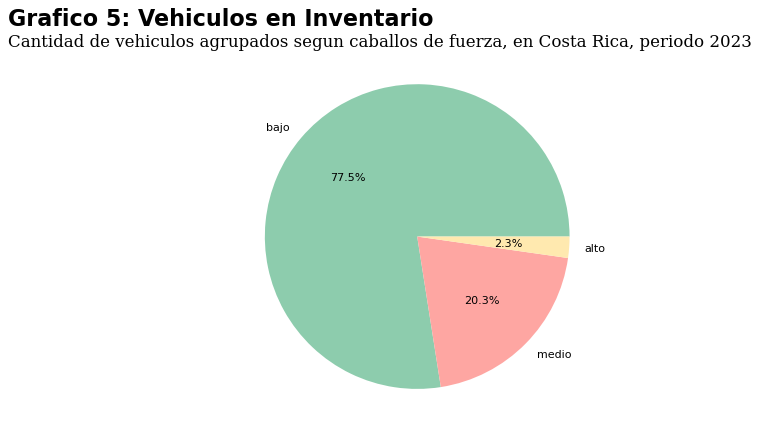

In [63]:
fig, ax = plt.subplots(1,1, figsize =(10,6.9), dpi=80)

 
eje_x = gf.index.tolist()
data = gf["symboling"].tolist()
 
bar_colors = ['#8dccad', '#fea6a2', '#ffe9af']

 
ax.pie(data, labels=eje_x, colors = bar_colors, autopct='%1.1f%%')

 
#--------------------------------------------------------------------------------------------#
#-----------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EFES DEL GRAFICO----------------#
#--------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO
 
title = "Grafico 5: Vehiculos en Inventario"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif",
             fontname = "Liberation Sans Narrow")
 
#FORMATO DEL SUBTITULO
subTitle = "Cantidad de vehiculos agrupados segun caballos de fuerza, en Costa Rica, periodo 2023"
ax.set_title(subTitle,
             horizontalalignment = "left",
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")
 
#CONFIGURA LA UBICACION EL TITULO, SUBTITULO Y GRAFICO
plt.subplots_adjust(top = 0.80)

 
plt.show()

In [64]:
gf = dfAutos.groupby(['style']).count()
gf = gf.iloc[:,:1]
gf = gf.sort_values('symboling', ascending=False)
gf

,symboling
style,
sedan,103
hatchback,75
wagon,26
hardtop,10
convertible,8


findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.


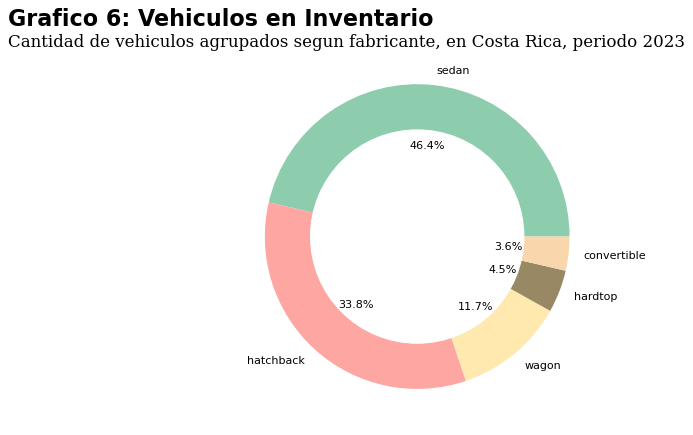

In [65]:
fig, ax = plt.subplots(1,1, figsize =(10,6.9), dpi=80)

eje_x = gf.index.tolist()
data = gf["symboling"].tolist()

bar_colors = ['#8dccad', '#fea6a2', '#ffe9af', '#988864', '#f9d6ac']

circulo = plt.Circle((0,0), 0.7, color='white')
ax.pie(data, labels=eje_x, colors = bar_colors, autopct='%1.1f%%')
 
#--------------------------------------------------------------------------------------------#
#-----------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EFES DEL GRAFICO----------------#
#--------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO

title = "Grafico 6: Vehiculos en Inventario"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif",
             fontname = "Liberation Sans Narrow")

#FORMATO DEL SUBTITULO
subTitle = "Cantidad de vehiculos agrupados segun fabricante, en Costa Rica, periodo 2023"
ax.set_title(subTitle,
             horizontalalignment = "left",
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

#COLOCAR EL CIRCULO QUE SE DIBUJO EN EL GRAFICO
p =plt.gcf()
p.gca().add_artist(circulo)

#CONFIGURA LA UBICACION EL TITULO, SUBTITULO Y GRAFICO
plt.subplots_adjust(top = 0.80) 

plt.show()

findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.


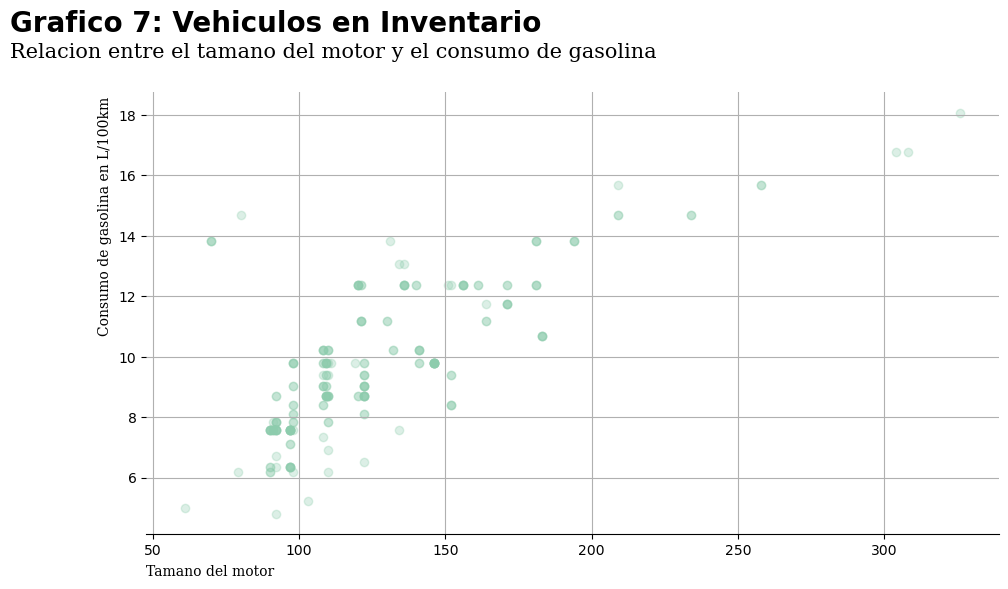

In [66]:
fig, ax = plt.subplots(1,1, figsize =(11,6.9), dpi=100)


eje_x = gf.index.tolist()
data = gf["symboling"].tolist()


n = 222
x = dfAutos['engineSize']
y = dfAutos['City L/100km (calc)']
ax.scatter(x, y, c='#8dccad', alpha=0.3)


ax.grid(True)


#--------------------------------------------------------------------------------------------#
#-----------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EFES DEL GRAFICO----------------#
#--------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO

title = "Grafico 7: Vehiculos en Inventario"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif",
             fontname = "Liberation Sans Narrow")

#FORMATO DEL SUBTITULO
subTitle = "Relacion entre el tamano del motor y el consumo de gasolina"
ax.set_title(subTitle,
             horizontalalignment = "left",
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

 
#FORMATO AL EJE (X/Y)
etiqueta = "Tamano del motor"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")
 
etiquetay = "Consumo de gasolina en L/100km"
ax.set_ylabel(etiquetay,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")

 

ax.xaxis.set_label_coords(x=0, y=-0.07, transform = ax.transAxes)
ax.yaxis.set_label_coords(x=-0.04, y=0.45, transform = ax.transAxes)

#FORMATO TAMANO LETRA AMBOS EJES
ax.tick_params(axis='both', labelsize = 10)

#CONFIGURA LA UBICACION EL TITULO, SUBTITULO Y GRAFICO
plt.subplots_adjust(top = 0.75)


plt.show()

findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.
findfont: Font family 'Liberation Sans Narrow' not found.


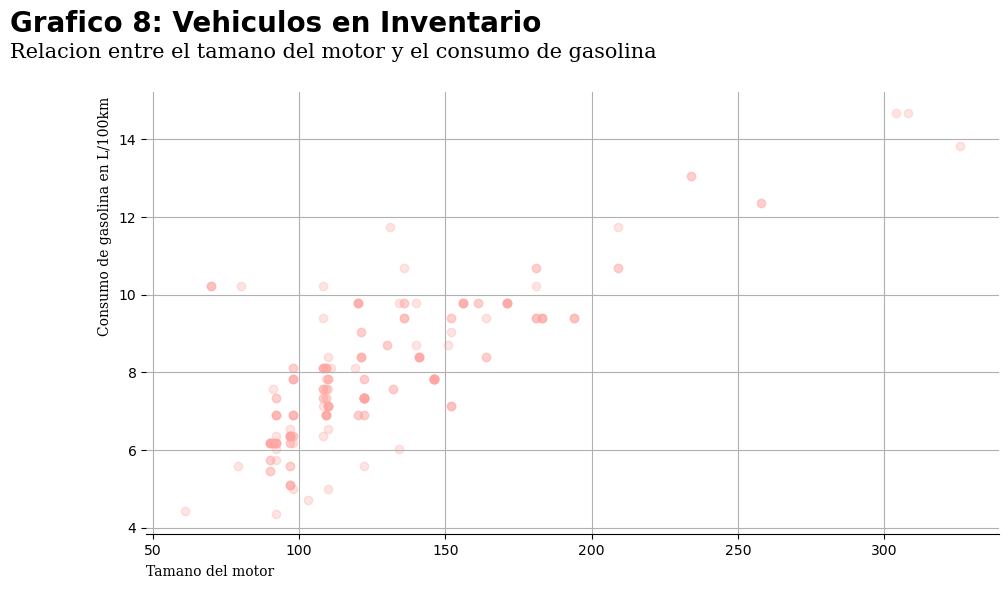

In [67]:
fig, ax = plt.subplots(1,1, figsize =(11,6.9), dpi=100)


eje_x = gf.index.tolist()
data = gf["symboling"].tolist()


n = 222
x = dfAutos['engineSize']
y = dfAutos['Higway L/100km (calc)']
ax.scatter(x, y, c='#fea6a2', alpha=0.3)


ax.grid(True)


#--------------------------------------------------------------------------------------------#
#-----------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EFES DEL GRAFICO----------------#
#--------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO


title = "Grafico 8: Vehiculos en Inventario"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif",
             fontname = "Liberation Sans Narrow")

 
#FORMATO DEL SUBTITULO
subTitle = "Relacion entre el tamano del motor y el consumo de gasolina"
ax.set_title(subTitle,
             horizontalalignment = "left",
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")
 

#FORMATO AL EJE (X/Y)
etiqueta = "Tamano del motor"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")


etiquetay = "Consumo de gasolina en L/100km"
ax.set_ylabel(etiquetay,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")
 

ax.xaxis.set_label_coords(x=0, y=-0.07, transform = ax.transAxes)
ax.yaxis.set_label_coords(x=-0.04, y=0.45, transform = ax.transAxes)


#FORMATO TAMANO LETRA AMBOS EJES
ax.tick_params(axis='both', labelsize = 10)


#CONFIGURA LA UBICACION EL TITULO, SUBTITULO Y GRAFICO
plt.subplots_adjust(top = 0.75)


plt.show()

In [68]:
# Aqui concluye el portafolio de evidencias.